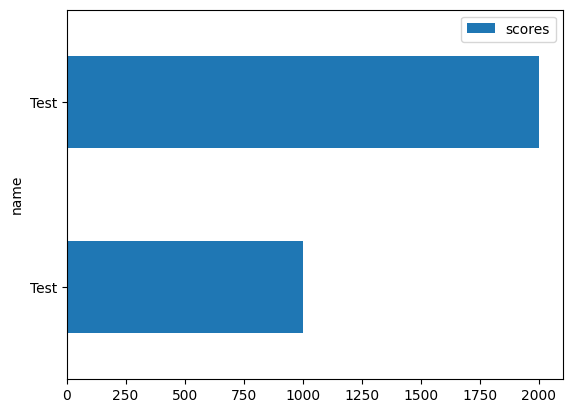

,class_name,spec_name,scores,id,spec_media
name,,,,,
Test,Demon Hunter,Havoc,1000,577,https://render.worldofwarcraft.com/us/icons/56...
Test,Demon Hunter,Vengeance,2000,581,https://render.worldofwarcraft.com/us/icons/56...


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib

spec_df = pd.read_csv('spec_df.csv').set_index(['class_name','spec_name'])

test_df = pd.DataFrame({'name':['Test','Test'], 'class_name':['Demon Hunter','Demon Hunter'], 'spec_name':['Havoc','Vengeance'], 'scores':[1000,2000]}).set_index(['name','class_name','spec_name'])
test_df = test_df.join(spec_df, how='left').reset_index().set_index('name')

ax = test_df.plot.barh(y=['spec_name','scores'], stacked=True)
plt.show()
test_df

In [ ]:
# Cumulative Scores per character in descending order
# Shaded Colour Scheme based on spec
#https://colorkit.co/color-shades-generator/ff7c0a/

In [38]:
from numpy import random

def randScore(n):
    scores = random.randint(100,3000, size=(1,n))
    return sorted(scores[0], reverse=True)

monk_scores = randScore(3)
dh_scores = randScore(2)
dk_scores = randScore(3)
monk_scores

[1804, 1730, 1262]

array([ 995, 2082])

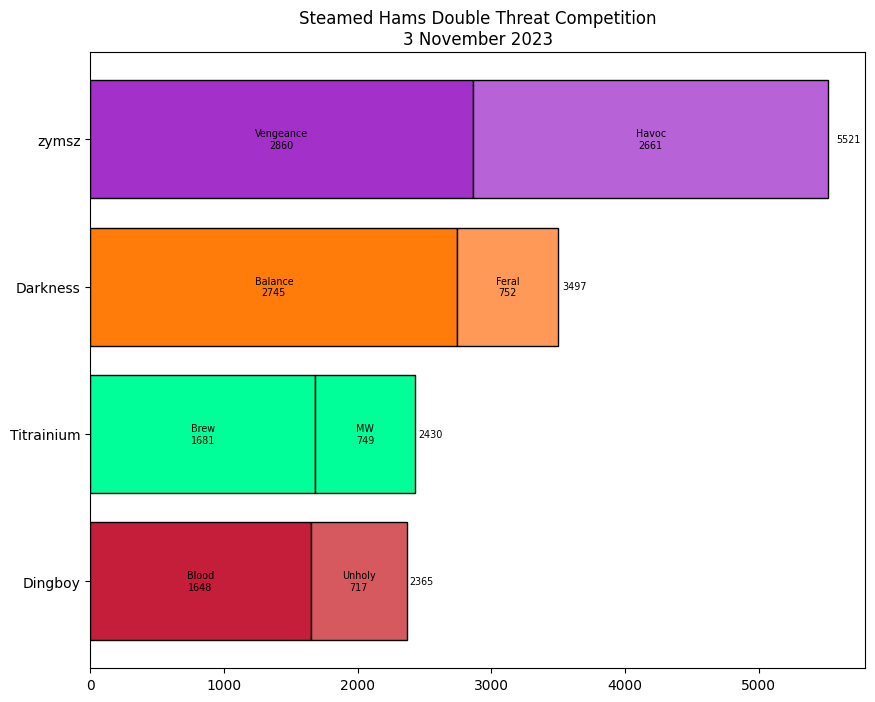

In [69]:
# Make ordered DataFrame and then feed into the below code / rework to use a dataframe
test = pd.DataFrame(
    {'char_name':['Titrainium','Dingboy','Darkness','zymsz'],
     'spec_score':[
         [randScore(1)[0],randScore(1)[0]],
         [randScore(1)[0],randScore(1)[0]],
         [randScore(1)[0],randScore(1)[0]],
         [randScore(1)[0],randScore(1)[0]]
         ],
     'color':[
         ['#00FF98','#00FF98'],
         ['#c41e3a','#d65960'],
         ['#FF7C0A','#ff9957'],
         ['#A330C9','#b762d6']
         ],
     'spec':[['Brew','MW'],['Blood','Unholy'],['Balance','Feral'],['Vengeance','Havoc']]})
test['total'] = test.spec_score.apply(lambda x : sum(x))
test = test.sort_values('total', ascending=True).reset_index()

fig, ax = plt.subplots(figsize=(10,8))
plt.title('Steamed Hams Double Threat Competition\n3 November 2023')

for i in test.index:
    barGen(test.loc[i]['char_name'], scores=test.loc[i]['spec_score'], colors=test.loc[i]['color'], specs=test.loc[i]['spec'], y_pos=i)

In [70]:
test

,index,char_name,spec_score,color,spec,total
0,1,Dingboy,"[1648, 717]","[#c41e3a, #d65960]","[Blood, Unholy]",2365
1,0,Titrainium,"[1681, 749]","[#00FF98, #00FF98]","[Brew, MW]",2430
2,2,Darkness,"[2745, 752]","[#FF7C0A, #ff9957]","[Balance, Feral]",3497
3,3,zymsz,"[2860, 2661]","[#A330C9, #b762d6]","[Vengeance, Havoc]",5521


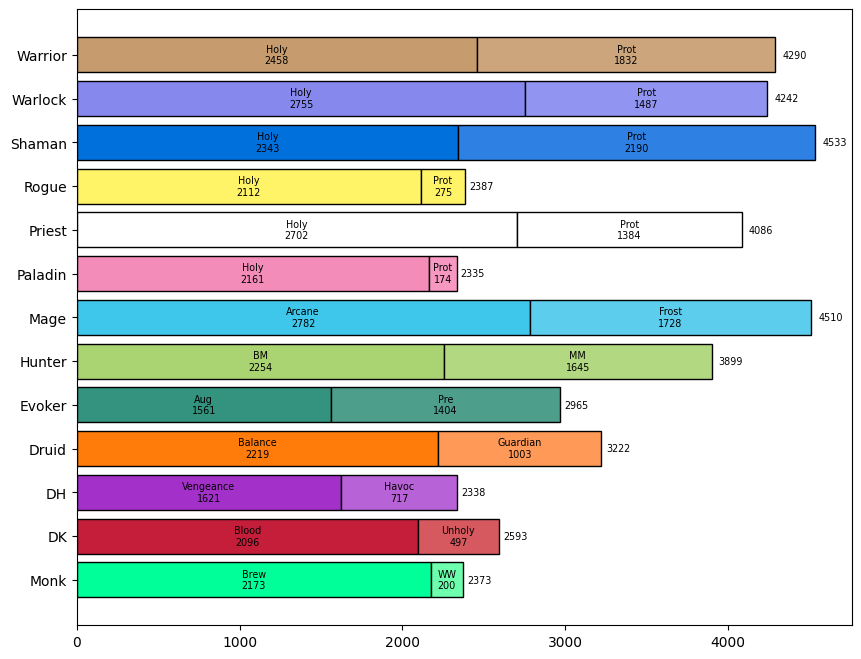

In [34]:
def barGen(class_name, scores, colors, specs, y_pos):
    ax.barh(class_name, scores[0], color=colors[0], left=0, edgecolor='black') #Spec 0 Bar 
    ax.barh(class_name, scores[1], color=colors[1], left=scores[0], edgecolor='black') #Spec 1 Bar

    plt.text(scores[0]/2, y_pos, f'{specs[0]}\n{scores[0]}', ha='center', va='center', fontsize='x-small') #Spec 0 score
    plt.text(scores[0]+scores[1]/2, y_pos,f'{specs[1]}\n{scores[1]}', ha='center', va='center', fontsize='x-small') #Spec 1 Score
    plt.text((scores[0]+scores[1])*1.01, y_pos,f'{scores[0] + scores[1]}', ha='left', va='center', fontsize='x-small') #Total Score

fig, ax = plt.subplots(figsize=(10,8))

barGen('Monk', scores=randScore(2), colors=['#00FF98','#6effae'], specs=['Brew','WW'], y_pos=0)
barGen('DK', scores=randScore(2), colors=['#c41e3a','#d65960'], specs=['Blood','Unholy'],y_pos=1)
barGen('DH', scores=randScore(2), colors=['#A330C9','#b762d6'], specs=['Vengeance','Havoc'], y_pos=2)
barGen('Druid', scores=randScore(2), colors=['#FF7C0A','#ff9957'], specs=['Balance','Guardian'], y_pos=3)
barGen('Evoker', scores=randScore(2), colors=['#33937F','#4d9e8b'], specs=['Aug','Pre'], y_pos=4)
barGen('Hunter', scores=randScore(2), colors=['#AAD372','#b2d881'], specs=['BM','MM'], y_pos=5)
barGen('Mage', scores=randScore(2), colors=['#3FC7EB','#5ccded'], specs=['Arcane','Frost'], y_pos=6)
barGen('Paladin', scores=randScore(2), colors=['#F48CBA','#f698c1'], specs=['Holy','Prot'], y_pos=7)
barGen('Priest', scores=randScore(2), colors=['#FFFFFF','#FFFFFF'], specs=['Holy','Prot'], y_pos=8)
barGen('Rogue', scores=randScore(2), colors=['#FFF468','#FFF468'], specs=['Holy','Prot'], y_pos=9)

barGen('Shaman', scores=randScore(2), colors=['#0070DD','#2e80e2'], specs=['Holy','Prot'], y_pos=10)
barGen('Warlock', scores=randScore(2), colors=['#8788EE','#9294f1'], specs=['Holy','Prot'], y_pos=11)
barGen('Warrior', scores=randScore(2), colors=['#C69B6D','#cca57c'], specs=['Holy','Prot'], y_pos=12)


<BarContainer object of 1 artists>

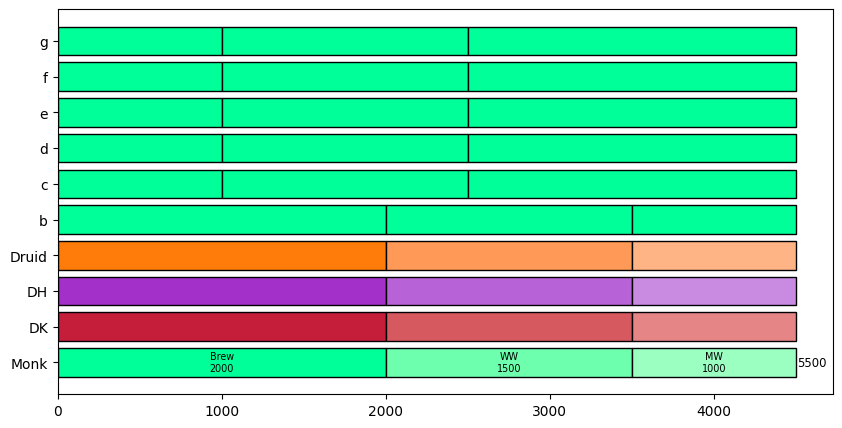

In [9]:
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

fig, ax = plt.subplots(figsize=(10,5))

ax.barh('Monk',2000, color='#00FF98', left=0, edgecolor='black')
ax.barh('Monk',1500, color='#6effae', left=2000, edgecolor='black')
ax.barh('Monk',1000, color='#9cffc2', left=3500, edgecolor='black')

plt.text(1000,0,'Brew\n2000', ha='center', va='center', fontsize='x-small')
plt.text(2750,0,'WW\n1500', ha='center', va='center', fontsize='x-small')
plt.text(4000,0,'MW\n1000', ha='center', va='center', fontsize='x-small')
plt.text(4600,0,'5500', ha='center', va='center', fontsize='small')

ax.barh('DK',2000, color='#c41e3a', left=0, edgecolor='black')
ax.barh('DK',1500, color='#d65960', left=2000, edgecolor='black')
ax.barh('DK',1000, color='#e58586', left=3500, edgecolor='black')

ax.barh('DH',2000, color='#A330C9', left=0, edgecolor='black')
ax.barh('DH',1500, color='#b762d6', left=2000, edgecolor='black')
ax.barh('DH',1000, color='#c98be2', left=3500, edgecolor='black')

ax.barh('Druid',2000, color='#FF7C0A', left=0, edgecolor='black')
ax.barh('Druid',1500, color='#ff9957', left=2000, edgecolor='black')
ax.barh('Druid',1000, color='#ffb485', left=3500, edgecolor='black')


ax.barh('b',2000, color='#00FF98', left=0, edgecolor='black')
ax.barh('b',1500, color='#00FF98', left=2000, edgecolor='black')
ax.barh('b',1000, color='#00FF98', left=3500, edgecolor='black')

ax.barh('c',1000, color='#00FF98', left=0, edgecolor='black')
ax.barh('c',1500, color='#00FF98', left=1000, edgecolor='black')
ax.barh('c',2000, color='#00FF98', left=2500, edgecolor='black')

ax.barh('d',1000, color='#00FF98', left=0, edgecolor='black')
ax.barh('d',1500, color='#00FF98', left=1000, edgecolor='black')
ax.barh('d',2000, color='#00FF98', left=2500, edgecolor='black')

ax.barh('e',1000, color='#00FF98', left=0, edgecolor='black')
ax.barh('e',1500, color='#00FF98', left=1000, edgecolor='black')
ax.barh('e',2000, color='#00FF98', left=2500, edgecolor='black')

ax.barh('f',1000, color='#00FF98', left=0, edgecolor='black')
ax.barh('f',1500, color='#00FF98', left=1000, edgecolor='black')
ax.barh('f',2000, color='#00FF98', left=2500, edgecolor='black')

ax.barh('g',1000, color='#00FF98', left=0, edgecolor='black')
ax.barh('g',1500, color='#00FF98', left=1000, edgecolor='black')
ax.barh('g',2000, color='#00FF98', left=2500, edgecolor='black')




#ax.bar_label('test')

#plt.imread(Image.open(urllib.request.urlopen(r'https://render.worldofwarcraft.com/us/icons/56/spell_holy_magicalsentry.jpg')))
#a = plt.imread('arcane_mage.jpg')
#plt.imshow(a, aspect=1)

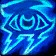

In [33]:
# open method used to open different extension image file 
#im = Image.open(r'https://render.worldofwarcraft.com/us/icons/56/spell_holy_magicalsentry.jpg')  
  
# This method will show image in any image viewer  
#im.show() 
Image.open(urllib.request.urlopen(r'https://render.worldofwarcraft.com/us/icons/56/spell_holy_magicalsentry.jpg'))


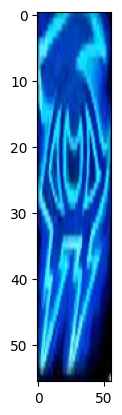

In [8]:
import urllib
import matplotlib.pyplot as plt
import requests

# create a file-like object from the url

# read the image file in a numpy array
a = plt.imread('arcane_mage.jpg')
plt.imshow(a, aspect=())
plt.show()

In [2]:
df2 = pd.DataFrame({'Titrainium':{'spec_name':['Brew','WW'],'scores':[100,200]}}).T
#ax = df2.plot.barh(x='rot=0, stacked=True)
#plot.show()
df2

,scores,spec_name
Titrainium,"[100, 200]","[Brew, WW]"


In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['Zymz', 'Titrainium', 'Dingboy']
df = pd.DataFrame({'Vengeance': [1000,np.nan,np.nan],
                   'Havoc':[2000,np.nan,np.nan],
                   'MW':[np.nan,1500,np.nan],
                   'Brew':[np.nan,60,np.nan],
                   'Priest0':[np.nan,np.nan,2500],
                   'priest1':[np.nan,np.nan,1250]}, index=index)
ax = df.plot.barh(rot=0, stacked=True)
ax.get_legend().remove()

# Annotate
ax.bar_label(ax.containers[0])
#for i in ax.patches:
#    plt.text(x=i, y=i.get_width(), s='test')
print('words')
#df

Text(600, -0.1, 'words')

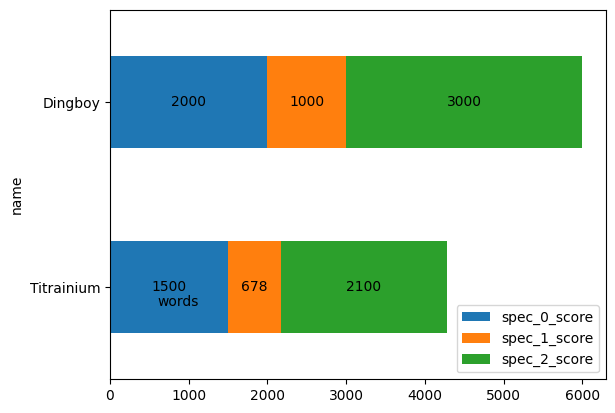

In [93]:
#df = pd.DataFrame({'name':['Titrainium','Titrainium'], 'specs':['Brew','WW'], 'scores':[250,1600]}).set_index('name')
df = pd.DataFrame({'name':['Titrainium','Dingboy'],
                   'spec_0_score':[1500,2000],
                   'spec_0':['Brew','Disc'],
                   'spec_1_score':[678,1000],
                   'spec_1':['WW','Holy'],
                   'spec_2_score':[2100,3000],
                   'spec_2':['MW','Shadow'],
                   })
df

ax = df.plot.barh(x='name', y=['spec_0_score','spec_1_score','spec_2_score'], stacked=True)

#plt.text(0,1000,'test')

ax.bar_label(ax.containers[2], label_type='center')
ax.bar_label(ax.containers[1], label_type='center')
ax.bar_label(ax.containers[0], label_type='center')

plt.text(600,-0.1,'words')

In [90]:
1500/2

750.0

In [75]:
ax.bar_label(ax.containers[1])[0]

AttributeError: 'Annotation' object has no attribute 'x'

In [78]:
plt.Text(0,1,'s')

TypeError: 'Text' object is not subscriptable

In [ ]:
df = pd.DataFrame({'name':['Titrainium','Titrainium'], 'specs':['Brew','WW']. 'scores':[250,1600]})

index = ['Zymz', 'Titrainium', 'Dingboy']
df = pd.DataFrame({'Vengeance': [1000,np.nan,np.nan],
                   'Havoc':[2000,np.nan,np.nan],
                   'MW':[np.nan,1500,np.nan],
                   'Brew':[np.nan,60,np.nan],
                   'Priest0':[np.nan,np.nan,2500],
                   'priest1':[np.nan,np.nan,1250]}, index=index)
ax = df.plot.barh(rot=0, stacked=True)
ax.get_legend().remove()

# Annotate
ax.bar_label(ax.containers[0])
#for i in ax.patches:
#    plt.text(x=i, y=i.get_width(), s='test')
print('words')
#df

In [ ]:
df

In [ ]:
ax.container

In [ ]:
print('words')

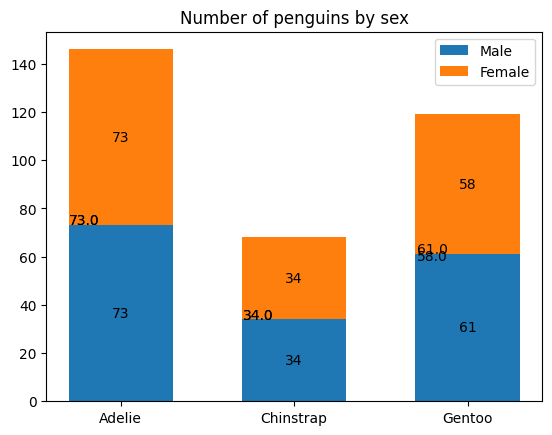

In [11]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

In [10]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Titrainium': {'spec_names':np.array(['Brew', 'WW']), spec_scores:[1000, 500]},
    'Dingboy': {'spec_names':np.array(['Shadow', 'Disc']), spec_scores:[2000, 1500]},
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex+'sfsf', bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

NameError: name 'spec_scores' is not defined

In [13]:
sex_counts = [
    {'name':'Titrainium', 'spec_names':np.array(['Brew', 'WW']), 'spec_scores':[1000, 500]},
    {'name':'Dingboy', 'spec_names':np.array(['Shadow', 'Disc']), 'spec_scores':[2000, 1500]}
]
#sex_counts.items()

In [11]:
{
    {'name':'Titrainium', 'spec_names':np.array(['Brew', 'WW']), 'spec_scores':[1000, 500]},
    {'name':'Dingboy', 'spec_names':np.array(['Shadow', 'Disc']), 'spec_scores':[2000, 1500]}
}

TypeError: unhashable type: 'dict'

In [7]:
test = pd.DataFrame({'a':[0,1,2],'b':[3,4,5]})
for a in test[['a','b']]:
    print(a)


a
b


In [8]:
test[['a','b']]

,a,b
0,0,3
1,1,4
2,2,5


In [20]:
a = {'Titrainium':{'spec_names':['WW','Brew']},'spec_scores':[1000,500]}
a.items()

dict_items([('Titrainium', {'spec_names': ['WW', 'Brew']}), ('spec_scores', [1000, 500])])

In [21]:
for a,b in a.items():
    print(a,b)

Titrainium {'spec_names': ['WW', 'Brew']}
spec_scores [1000, 500]


In [7]:
for i in ax.patches:
    i.name = 'a'

In [9]:
ax.patches[0].name

'a'

In [13]:
ax.patches[0]

AttributeError: 'Rectangle' object has no attribute 'get_name'

AttributeError: module 'matplotlib.pyplot' has no attribute 'patches'

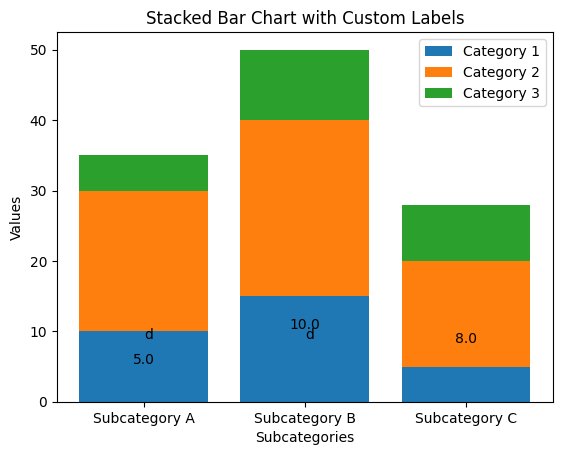

In [28]:
import matplotlib.pyplot as plt

# Sample data for the stacked bar chart
categories = ['Category 1', 'Category 2', 'Category 3']
subcategories = ['Subcategory A', 'Subcategory B', 'Subcategory C']
values = {
    'Category 1': [10, 15, 5],
    'Category 2': [20, 25, 15],
    'Category 3': [5, 10, 8],
}

# Create a figure and axis for the bar chart
fig, ax = plt.subplots()

# Create stacked bar chart
bottom = [0] * len(subcategories)
for category in categories:
    values_for_category = values[category]
    bars = ax.bar(subcategories, values_for_category, label=category, bottom=bottom)
    bottom = [b + v for b, v in zip(bottom, values_for_category)]

# Add custom labels for each patch
for bar in bars:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x() + width / 2
    label_text = f'{height:.1f}'  # Customize the label text as needed
    ax.annotate(label_text, (x, height), ha='center', va='bottom')

# Set labels and legends
ax.set_xlabel('Subcategories')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Chart with Custom Labels')
ax.legend()

plt.text(0,8.9,'d')
plt.text(1,8.9,'d')

# Create a Rectangle patch
rect = plt.patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


In [ ]:
#for i in row:
#   for spec in spec_list
        #plt.text(x,y,spec)